In [87]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
pd.set_option("display.max_column",None)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples


In [88]:
data = pd.read_csv('german_credit_data.csv')
data = data.drop(columns = ['Unnamed: 0'])
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [89]:
data['Saving accounts'] = data['Saving accounts'].fillna("no checking account")
data['Checking account'] = data['Checking account'].fillna("critical account/ other credits existing")

In [90]:
data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


## Exploratory Data Analysis

### What is the distribution of customer ages in the dataset?

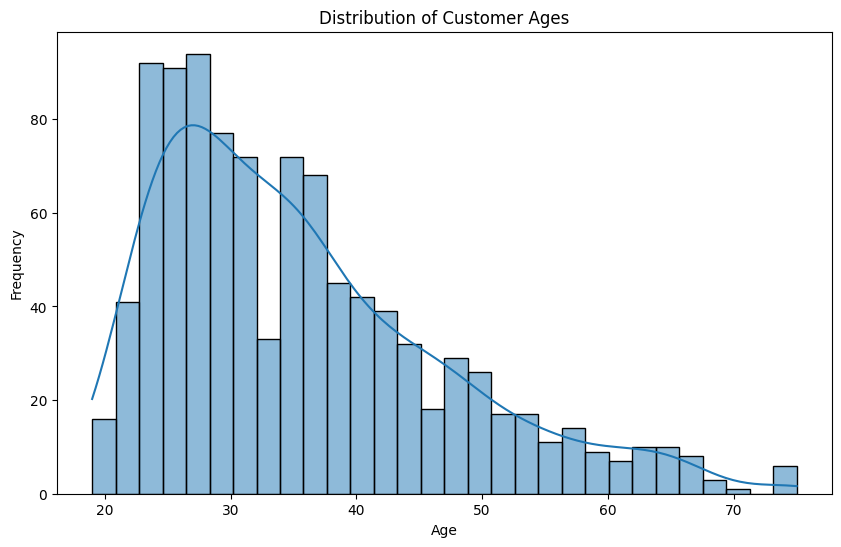

In [92]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Is there a correlation between Age and the Amount of Credit requested?

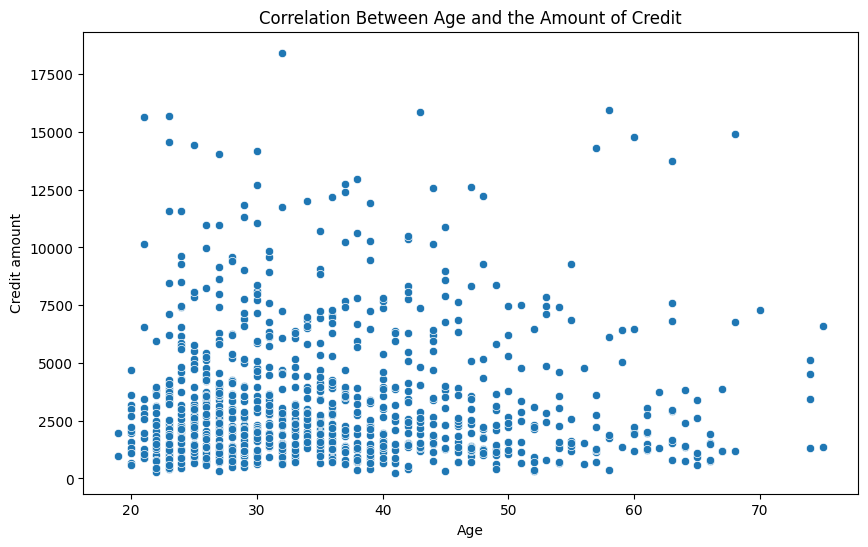

In [93]:
# 2. Korelasi antara Usia dan Jumlah Kredit yang Diminta
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Credit amount', data=data)
plt.title('Correlation Between Age and the Amount of Credit')
plt.xlabel('Age')
plt.ylabel('Credit amount')
plt.show()

### What is the distribution of Gender among customers?

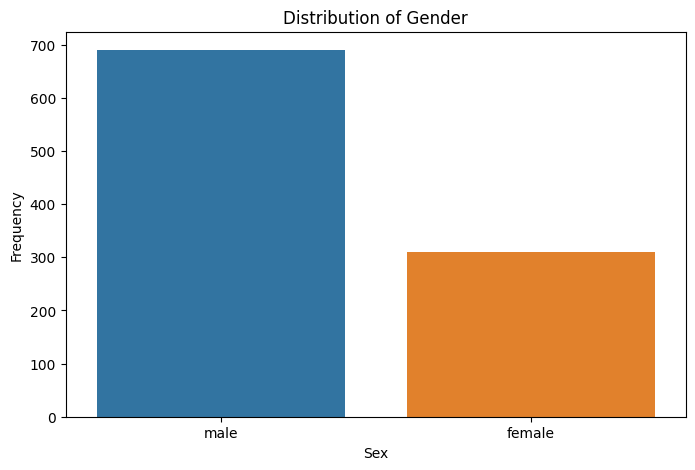

In [94]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', data=data)
plt.title('Distribution of Gender')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

### Is there a difference in Credit Amount between Males and Females?

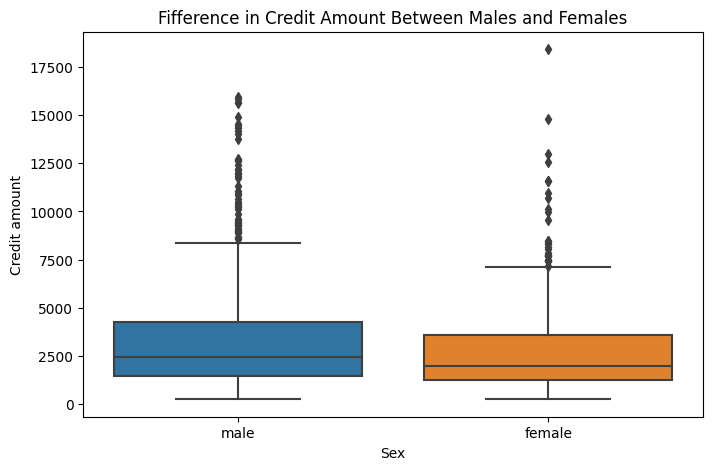

In [95]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Sex', y='Credit amount', data=data)
plt.title('Fifference in Credit Amount Between Males and Females')
plt.xlabel('Sex')
plt.ylabel('Credit amount')
plt.show()

### What is the distribution of Job Types among customers?

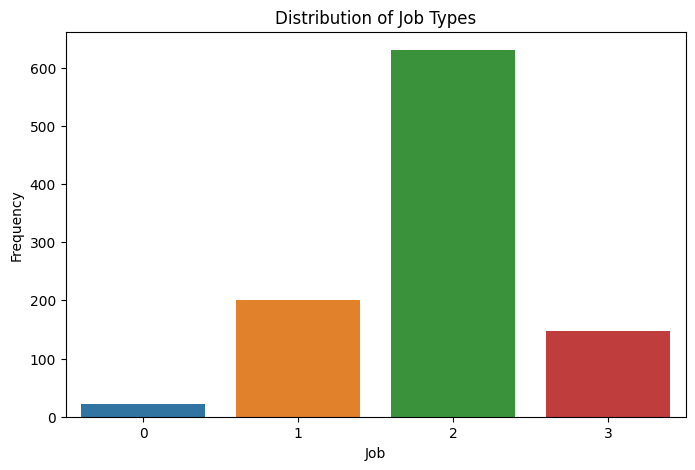

In [96]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Job', data=data)
plt.title('Distribution of Job Types')
plt.xlabel('Job')
plt.ylabel('Frequency')
plt.show()


### Is there a correlation between Job Type and the Amount of Credit requested?

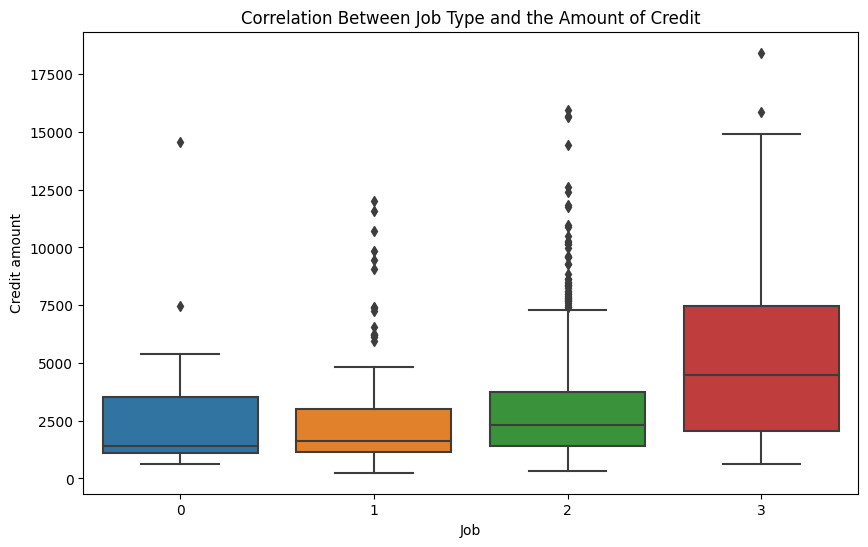

In [97]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Job', y='Credit amount', data=data)
plt.title('Correlation Between Job Type and the Amount of Credit')
plt.xlabel('Job')
plt.ylabel('Credit amount')
plt.show()


### What is the distribution of Housing Types among customers?

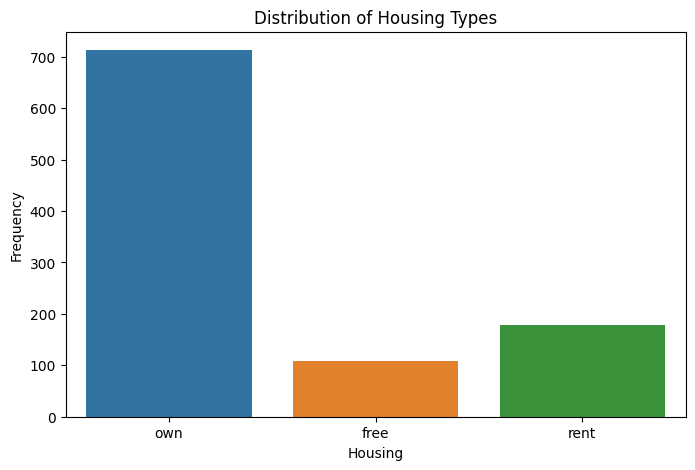

In [98]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Housing', data=data)
plt.title('Distribution of Housing Types')
plt.xlabel('Housing')
plt.ylabel('Frequency')
plt.show()


### Is there a correlation between Housing Type and the Amount of Credit requested?

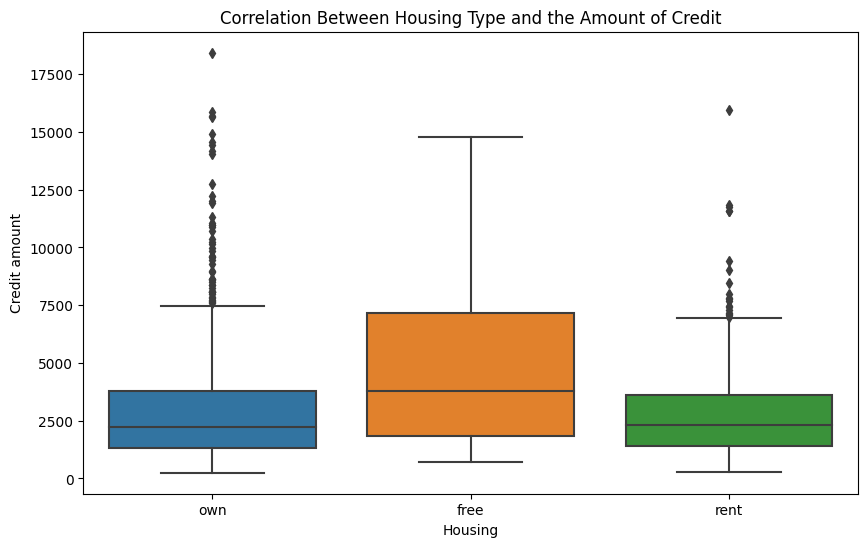

In [99]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Housing', y='Credit amount', data=data)
plt.title('Correlation Between Housing Type and the Amount of Credit')
plt.xlabel('Housing')
plt.ylabel('Credit amount')
plt.show()


### What is the distribution of Saving Accounts among customers?

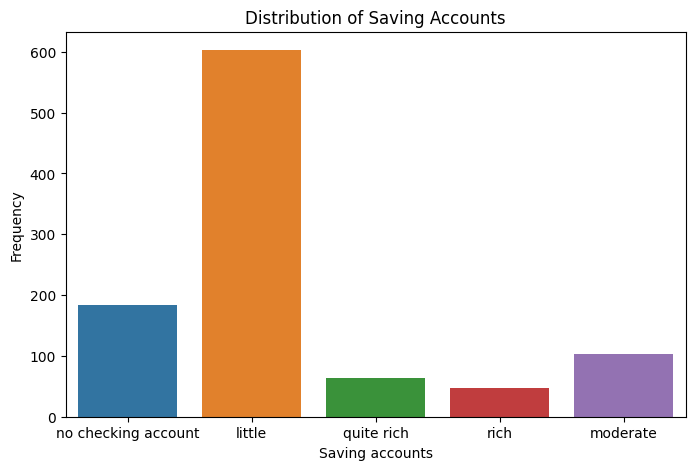

In [100]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Saving accounts', data=data)
plt.title('Distribution of Saving Accounts')
plt.xlabel('Saving accounts')
plt.ylabel('Frequency')
plt.show()


### Is there a correlation between Saving Accounts and the Amount of Credit requested?

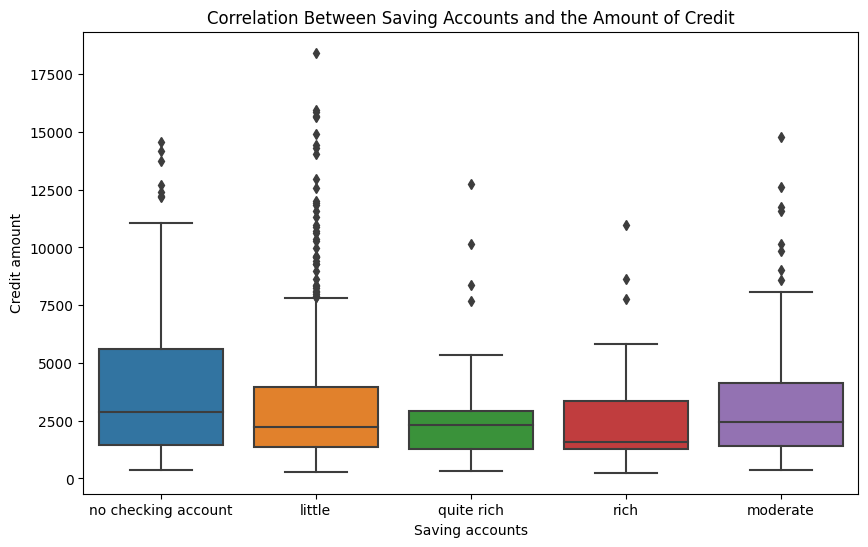

In [101]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Saving accounts', y='Credit amount', data=data)
plt.title('Correlation Between Saving Accounts and the Amount of Credit')
plt.xlabel('Saving accounts')
plt.ylabel('Credit amount')
plt.show()


## Preprocessing

In [102]:
# Split data
df_train_val, df_test = train_test_split(data, test_size=0.1, random_state=27)
df_train, df_val = train_test_split(df_train_val, test_size=0.2, random_state=27)

print('Train Size : ', df_train.shape)
print('Val Size : ', df_test.shape)
print('Test Size : ', df_val.shape)

Train Size :  (720, 9)
Val Size :  (100, 9)
Test Size :  (180, 9)


In [103]:
print(f'X_train proportion: {len(df_train) / len(data):.1f}')
print(f'X_test proportion: {len(df_test) / len(data):.1f}')
print(f'X_val proportion: {len(df_val) / len(data):.1f}')

X_train proportion: 0.7
X_test proportion: 0.1
X_val proportion: 0.2


In [104]:
num_columns = df_train.select_dtypes(include=[np.number]).columns.tolist() # memasukan kolom bertipe data numerik
cat_columns = df_train.select_dtypes(include=['object']).columns.tolist() # memasukan kolom bertipe data obj 

# melihat isi dari num_columns dan cat_columns
print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['Age', 'Job', 'Credit amount', 'Duration']
Cat Columns :  ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']


In [105]:
scaler = StandardScaler()
df_train_scaled = scaler.fit_transform(df_train[num_columns])
df_final = pd.DataFrame(df_train_scaled, columns=num_columns)

In [106]:
# Untuk Visualisasi data adlam 2 dimensi
pca_2d=PCA(n_components=2, random_state=27)
vis=pca_2d.fit_transform(df_final)

In [107]:
pca = PCA(n_components=4).fit(df_final)
cumsum = np.cumsum(pca.explained_variance_ratio_)

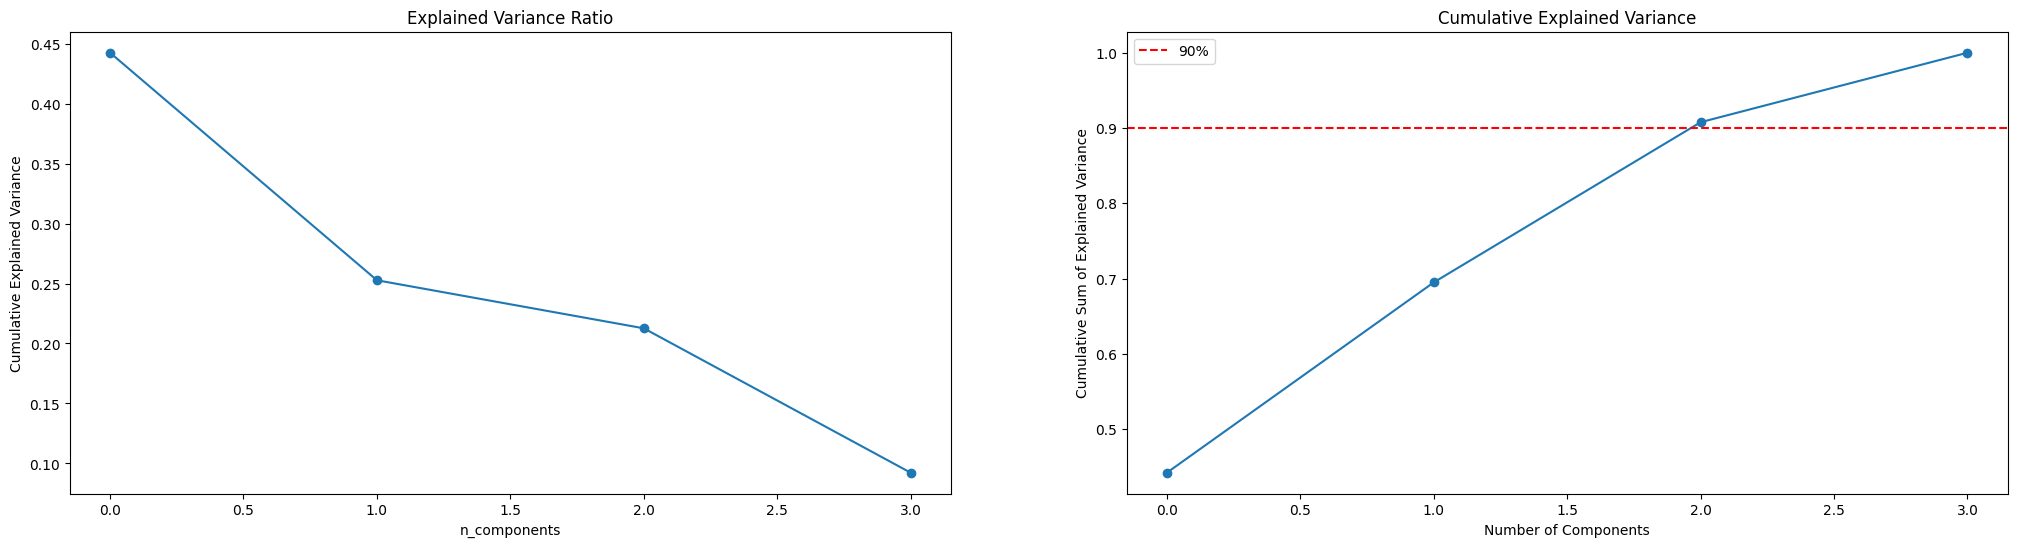

Number of components: 2
Explained variance: 0.907732298539215


In [108]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance Ratio')
plt.xlabel('n_components')
plt.ylabel('Cumulative Explained Variance')
plt.subplot(1, 2, 2)
plt.plot(cumsum, marker='o')
plt.axhline(y=0.9, color='red', linestyle='--', label='90%')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Sum of Explained Variance')
plt.legend()
plt.show()
print(f'Number of components: {np.argmax(cumsum >= 0.9)}')
print(f'Explained variance: {cumsum[np.argmax(cumsum >= 0.9)]}')

In [109]:
pca_2d = PCA(n_components=2, random_state=27)

In [110]:
df_train_red = pca_2d.fit_transform(df_final)

# Convert to dataframe
df_train_red = pd.DataFrame(df_train_red, columns=['PCA_' + str(i) for i in range(1, 3)])

In [111]:
df_train_red

,PCA_1,PCA_2
0,-0.447176,-0.119676
1,-0.836850,0.627327
2,1.422318,-0.800974
3,-0.238086,-0.203238
4,0.517628,-0.046062
...,...,...
715,0.098644,-0.713698
716,0.479080,0.004626
717,0.483598,0.591229
718,-0.194053,0.403656


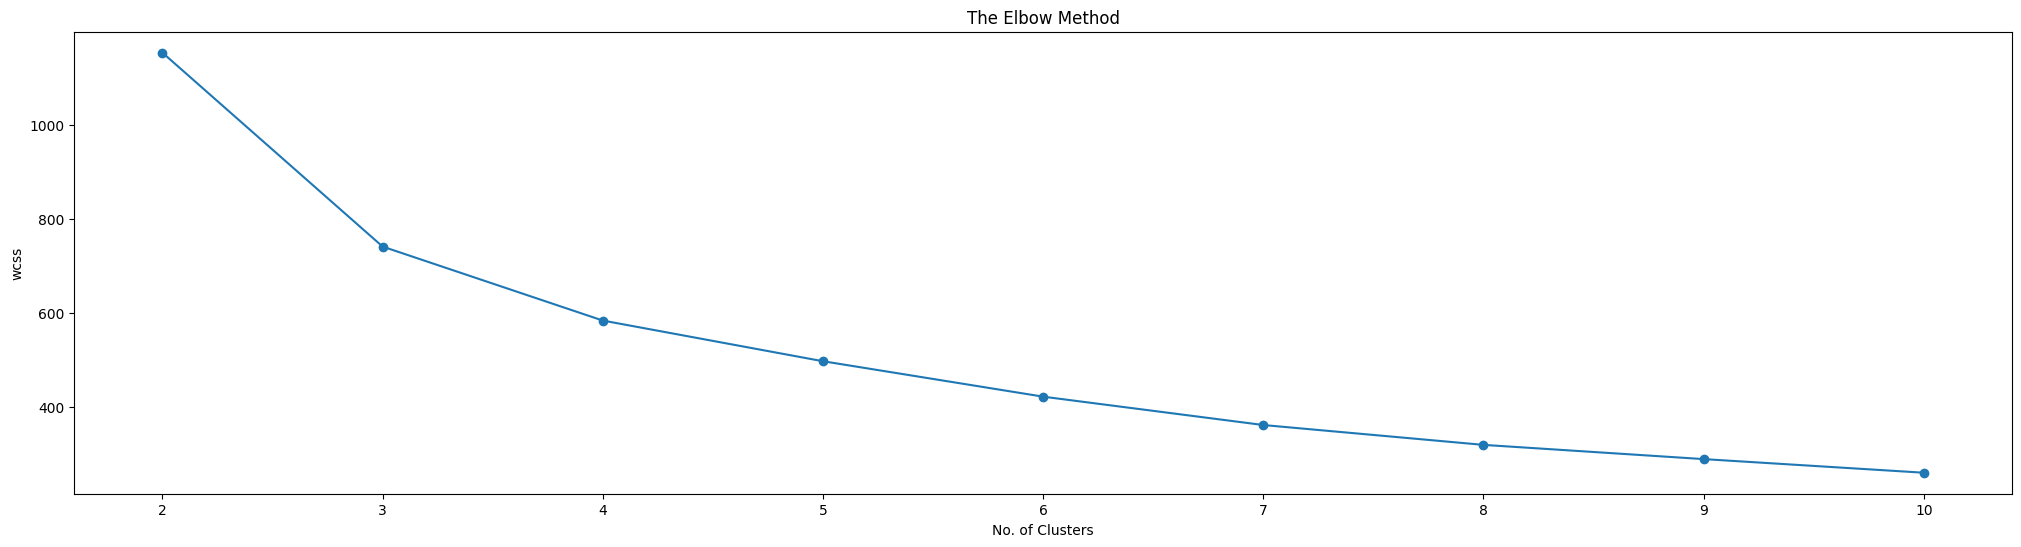

In [112]:
wcss = []
for i in range(2, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 27)
    km.fit(df_train_red)
    wcss.append(km.inertia_)

plt.figure(figsize=(25, 6))   
plt.plot(range(2, 11), wcss, marker ="o")
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [113]:
kmeans_score = pd.DataFrame(columns=['K', 'Silhouette Score'])
for i in range(2, 11):
    kmeans_score.loc[i-2] = [i, round(silhouette_score(df_train_red, KMeans(n_clusters=i, random_state=27).fit(df_train_red).labels_), 3)]


In [114]:
kmeans_score.sort_values(by='Silhouette Score', ascending=False)

,K,Silhouette Score
0,2.0,0.455
1,3.0,0.425
2,4.0,0.351
7,9.0,0.346
3,5.0,0.343
8,10.0,0.343
5,7.0,0.340
6,8.0,0.339
4,6.0,0.330


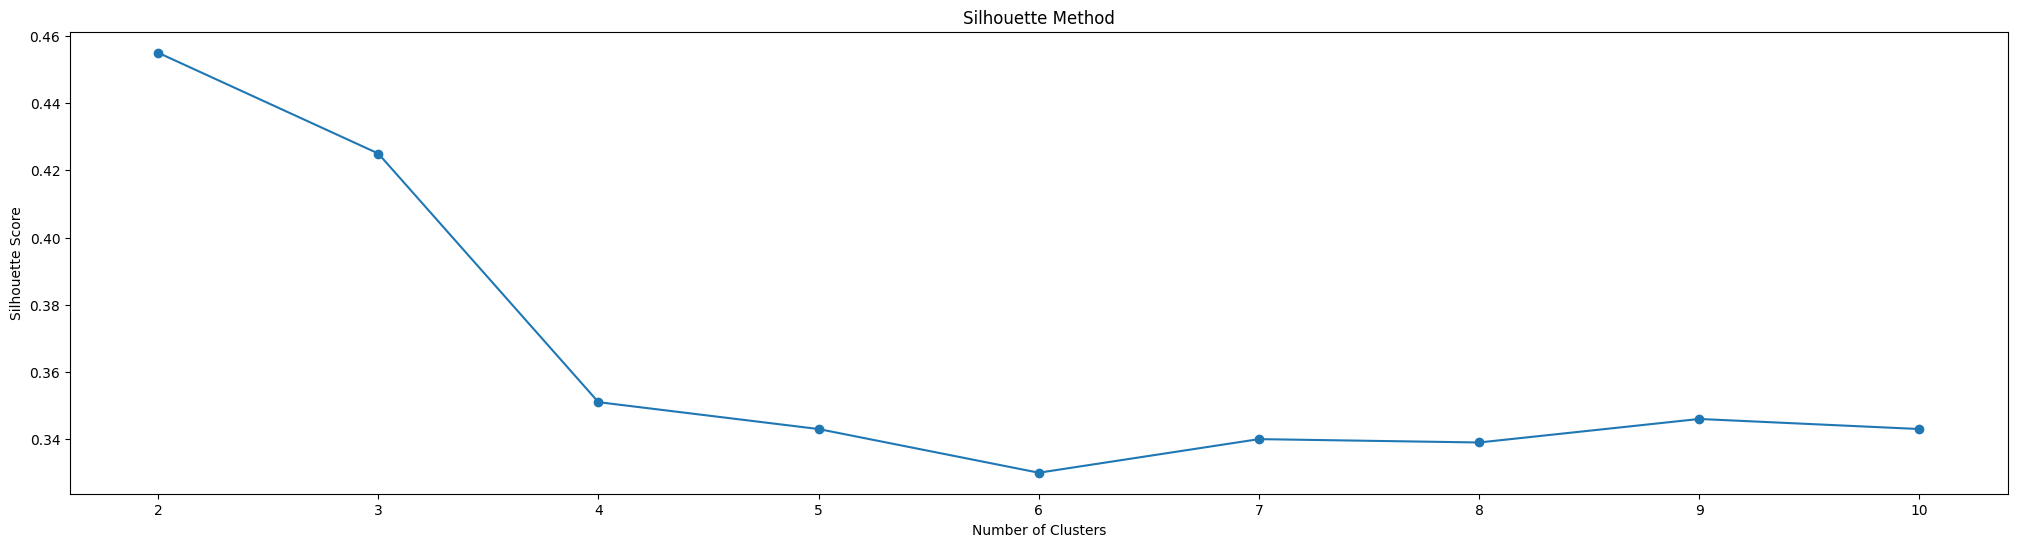

In [115]:
plt.figure(figsize=(25, 6))
plt.plot(kmeans_score['K'], kmeans_score['Silhouette Score'], marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

## Modeling

In [116]:
kmeans = KMeans(n_clusters=4, random_state=27)
df_pred = kmeans.fit_predict(df_train_red)

In [117]:
df_train_red['CLUSTER'] = df_pred

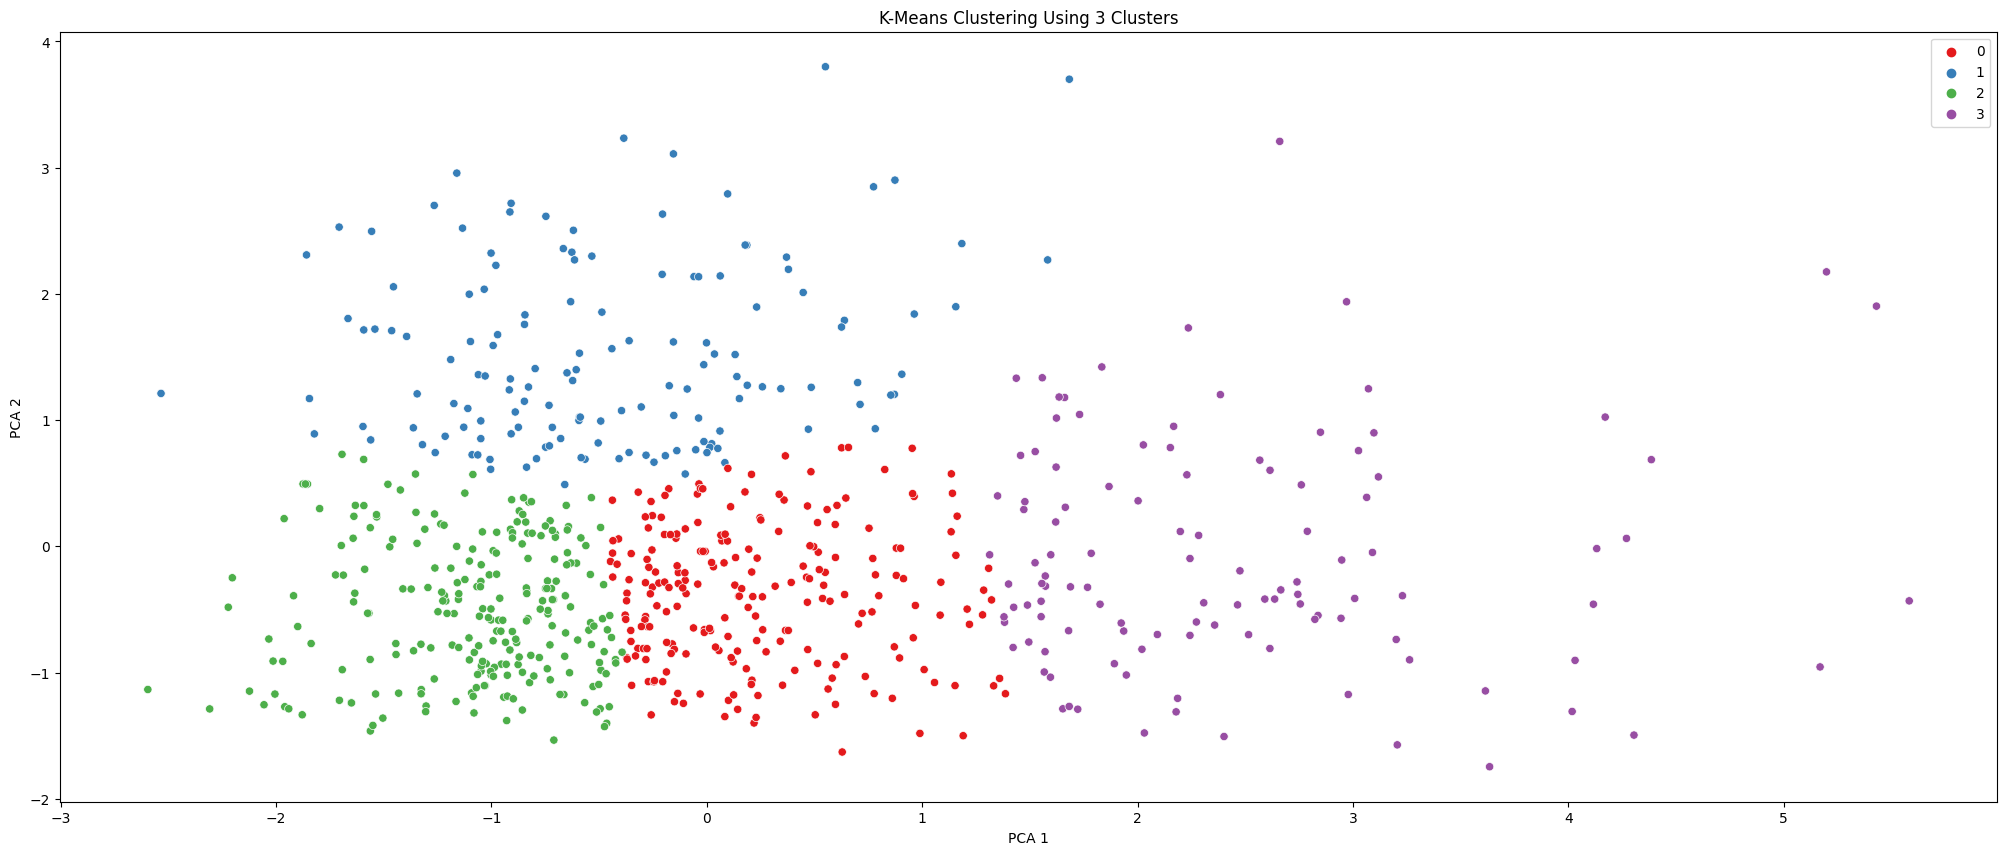

In [118]:
plt.figure(figsize=(25, 10))
sns.scatterplot(x=vis[:,0], y=vis[:, 1], hue=df_pred, data=df_train_red, palette='Set1')
plt.title('K-Means Clustering Using 3 Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [119]:
df_train_red

,PCA_1,PCA_2,CLUSTER
0,-0.447176,-0.119676,0
1,-0.836850,0.627327,1
2,1.422318,-0.800974,3
3,-0.238086,-0.203238,0
4,0.517628,-0.046062,0
...,...,...,...
715,0.098644,-0.713698,0
716,0.479080,0.004626,0
717,0.483598,0.591229,0
718,-0.194053,0.403656,0


In [120]:
df_train = df_train.reset_index(drop=True)
df_train_red['CLUSTER'] = df_train_red['CLUSTER'].reset_index(drop=True)
data_fix = pd.concat([df_train, df_train_red['CLUSTER']], axis=1)
data_fix

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,CLUSTER
0,32,female,2,own,little,critical account/ other credits existing,4611,6,furniture/equipment,0
1,41,male,2,rent,little,critical account/ other credits existing,1503,12,car,1
2,27,male,2,own,little,critical account/ other credits existing,8648,24,business,3
3,33,male,2,own,moderate,critical account/ other credits existing,1474,24,car,0
4,31,female,3,own,quite rich,critical account/ other credits existing,2782,21,car,0
...,...,...,...,...,...,...,...,...,...,...
715,27,male,2,own,little,moderate,3652,21,business,0
716,37,male,2,free,little,critical account/ other credits existing,1819,36,education,0
717,38,male,3,own,no checking account,critical account/ other credits existing,3229,18,car,0
718,40,male,2,own,little,critical account/ other credits existing,1585,24,furniture/equipment,0


## Analysis Cluster

In [121]:
cluster0 = data_fix[data_fix.CLUSTER == 0]
cluster1 = data_fix[data_fix.CLUSTER == 1]
cluster2 = data_fix[data_fix.CLUSTER == 2]
cluster3 = data_fix[data_fix.CLUSTER == 3]

## Cluster 0

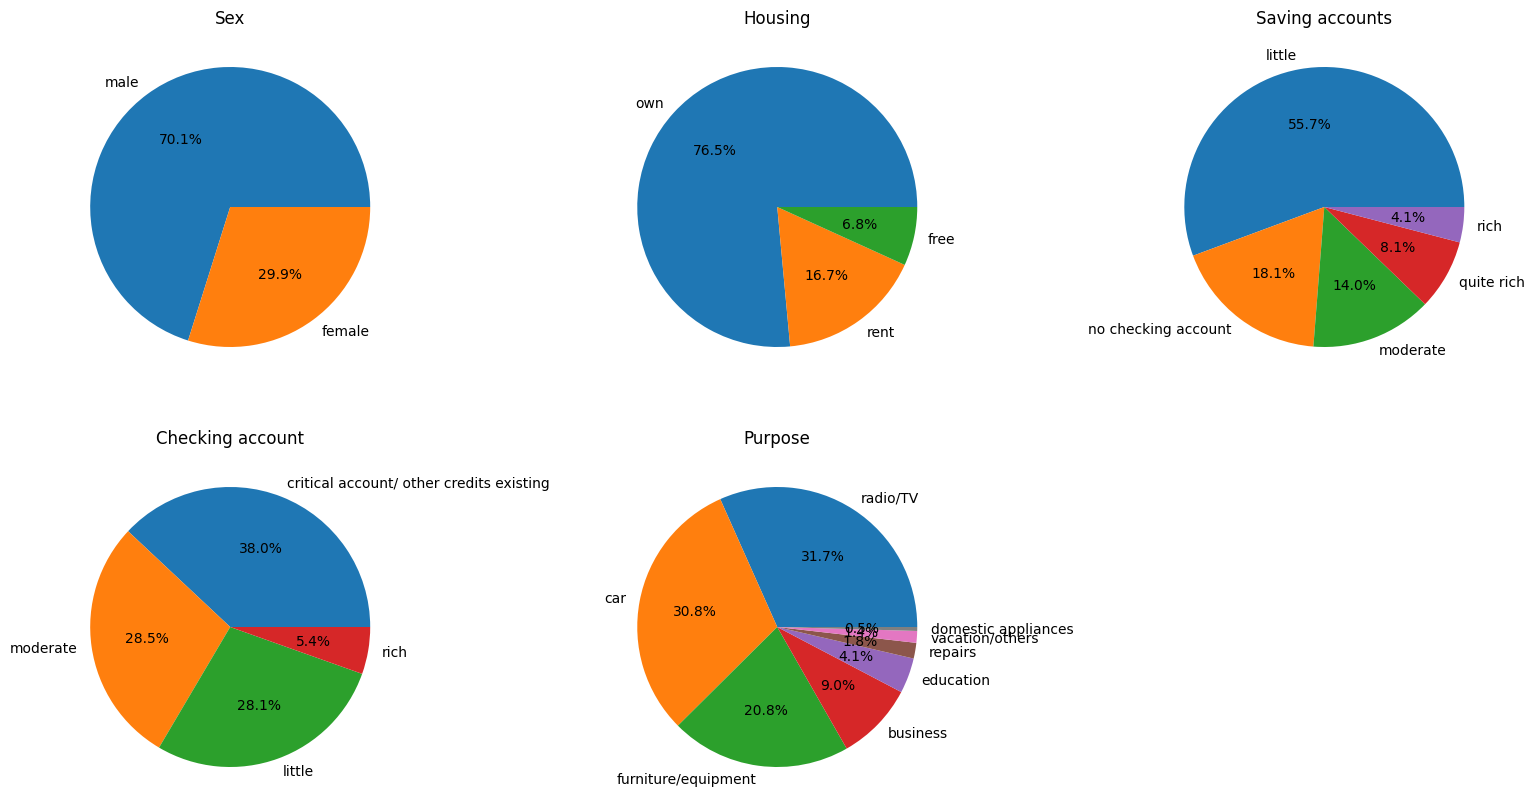

In [122]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.pie(cluster0['Sex'].value_counts(), labels= cluster0['Sex'].value_counts().index, autopct = '%1.1f%%')
plt.title('Sex')

plt.subplot(2,3,2)
plt.pie(cluster0['Housing'].value_counts(), labels= cluster0['Housing'].value_counts().index, autopct = '%1.1f%%')
plt.title('Housing')

plt.subplot(2,3,3)
plt.pie(cluster0['Saving accounts'].value_counts(), labels= cluster0['Saving accounts'].value_counts().index, autopct = '%1.1f%%')
plt.title('Saving accounts')

plt.subplot(2,3,4)
plt.pie(cluster0['Checking account'].value_counts(), labels= cluster0['Checking account'].value_counts().index, autopct = '%1.1f%%')
plt.title('Checking account')

plt.subplot(2,3,5)
plt.pie(cluster0['Purpose'].value_counts(), labels= cluster0['Purpose'].value_counts().index, autopct = '%1.1f%%')
plt.title('Purpose')
plt.show()

In [123]:
cluster0.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,221.0,30.819005,5.661979,20.0,26.0,31.0,35.0,46.0
Job,221.0,2.081448,0.558138,0.0,2.0,2.0,2.0,3.0
Credit amount,221.0,3282.950226,1629.039815,629.0,2235.0,3105.0,3990.0,14555.0
Duration,221.0,24.190045,7.913745,6.0,18.0,24.0,28.0,48.0
CLUSTER,221.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


**Demographics**: This cluster primarily includes adults in their early to mid-adulthood, with a diverse range of employment statuses.

**Borrowing Behavior**: They have a wide range of credit needs and loan durations, indicating varied financial goals. This group may encompass individuals in various life stages and financial situations.

**Housing**: A majority of individuals own their homes, suggesting a degree of stability in their living situation.

**Gender**: The gender distribution is slightly skewed towards males.

**Recommendations**: Financial products tailored to diverse needs and flexible loan terms may be beneficial for this cluster.

## Cluster 1

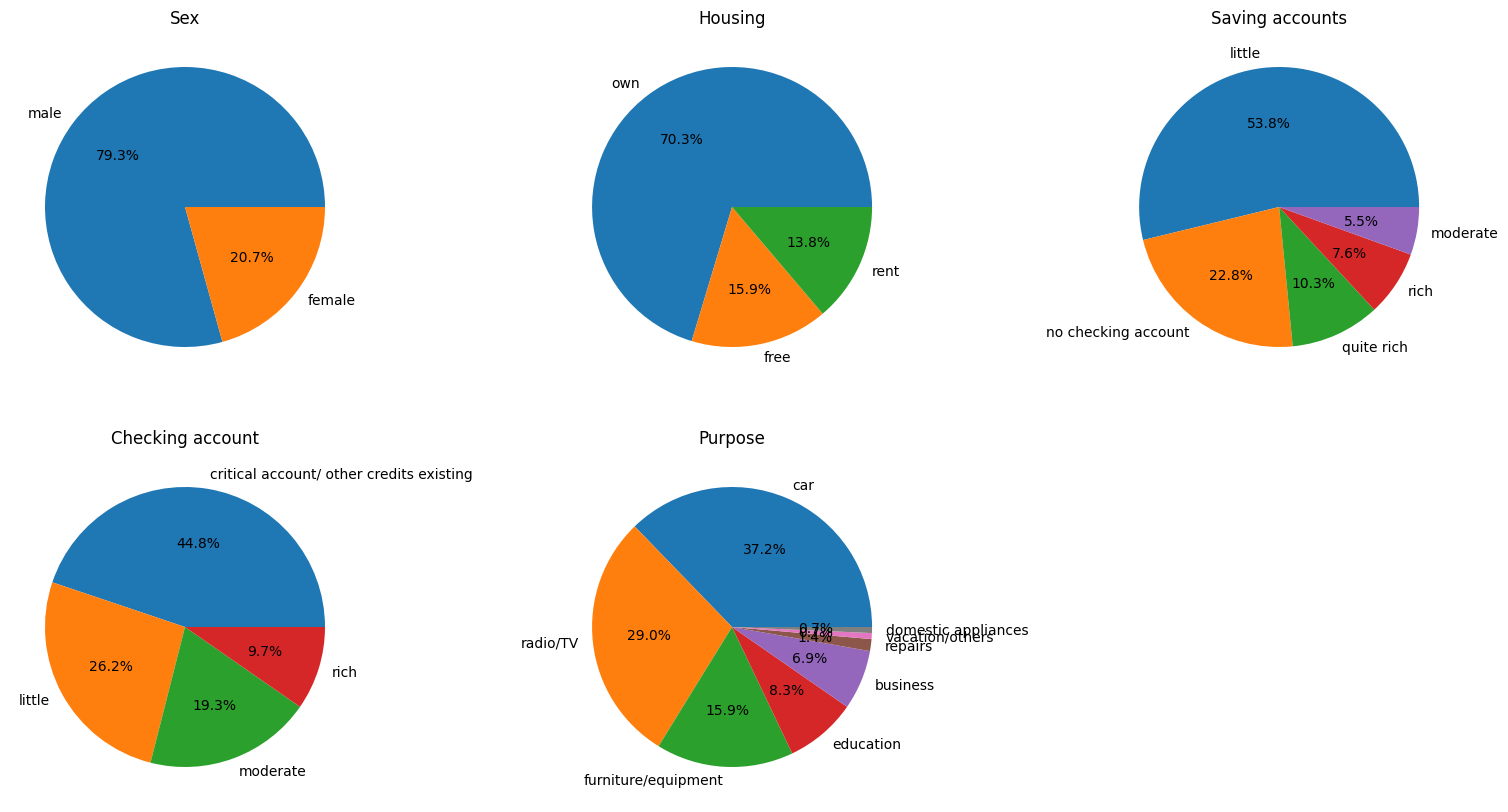

In [124]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.pie(cluster1['Sex'].value_counts(), labels= cluster1['Sex'].value_counts().index, autopct = '%1.1f%%')
plt.title('Sex')

plt.subplot(2,3,2)
plt.pie(cluster1['Housing'].value_counts(), labels= cluster1['Housing'].value_counts().index, autopct = '%1.1f%%')
plt.title('Housing')

plt.subplot(2,3,3)
plt.pie(cluster1['Saving accounts'].value_counts(), labels= cluster1['Saving accounts'].value_counts().index, autopct = '%1.1f%%')
plt.title('Saving accounts')

plt.subplot(2,3,4)
plt.pie(cluster1['Checking account'].value_counts(), labels= cluster1['Checking account'].value_counts().index, autopct = '%1.1f%%')
plt.title('Checking account')

plt.subplot(2,3,5)
plt.pie(cluster1['Purpose'].value_counts(), labels= cluster1['Purpose'].value_counts().index, autopct = '%1.1f%%')
plt.title('Purpose')
plt.show()

In [125]:
cluster1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,145.0,52.000000,8.106924,35.0,46.0,50.0,58.0,75.0
Job,145.0,1.937931,0.637058,0.0,2.0,2.0,2.0,3.0
Credit amount,145.0,2248.558621,1458.353428,338.0,1231.0,1908.0,2835.0,7596.0
Duration,145.0,16.000000,7.487026,6.0,12.0,12.0,24.0,36.0
CLUSTER,145.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


**Demographics**: This cluster primarily consists of older individuals, ranging from middle-aged to seniors.

**Borrowing Behavior**: They tend to request lower credit amounts and opt for shorter loan durations, indicating a more conservative approach to borrowing. This group may be more risk-averse or have different financial priorities.

**Housing**: A significant majority of individuals in this cluster own their homes, suggesting stability in their living arrangements.

**Gender**: The gender distribution is skewed towards males.

**Recommendations**: Products with lower credit limits and shorter terms, along with options for financial planning or retirement services, may be well-received.

## Cluster 2

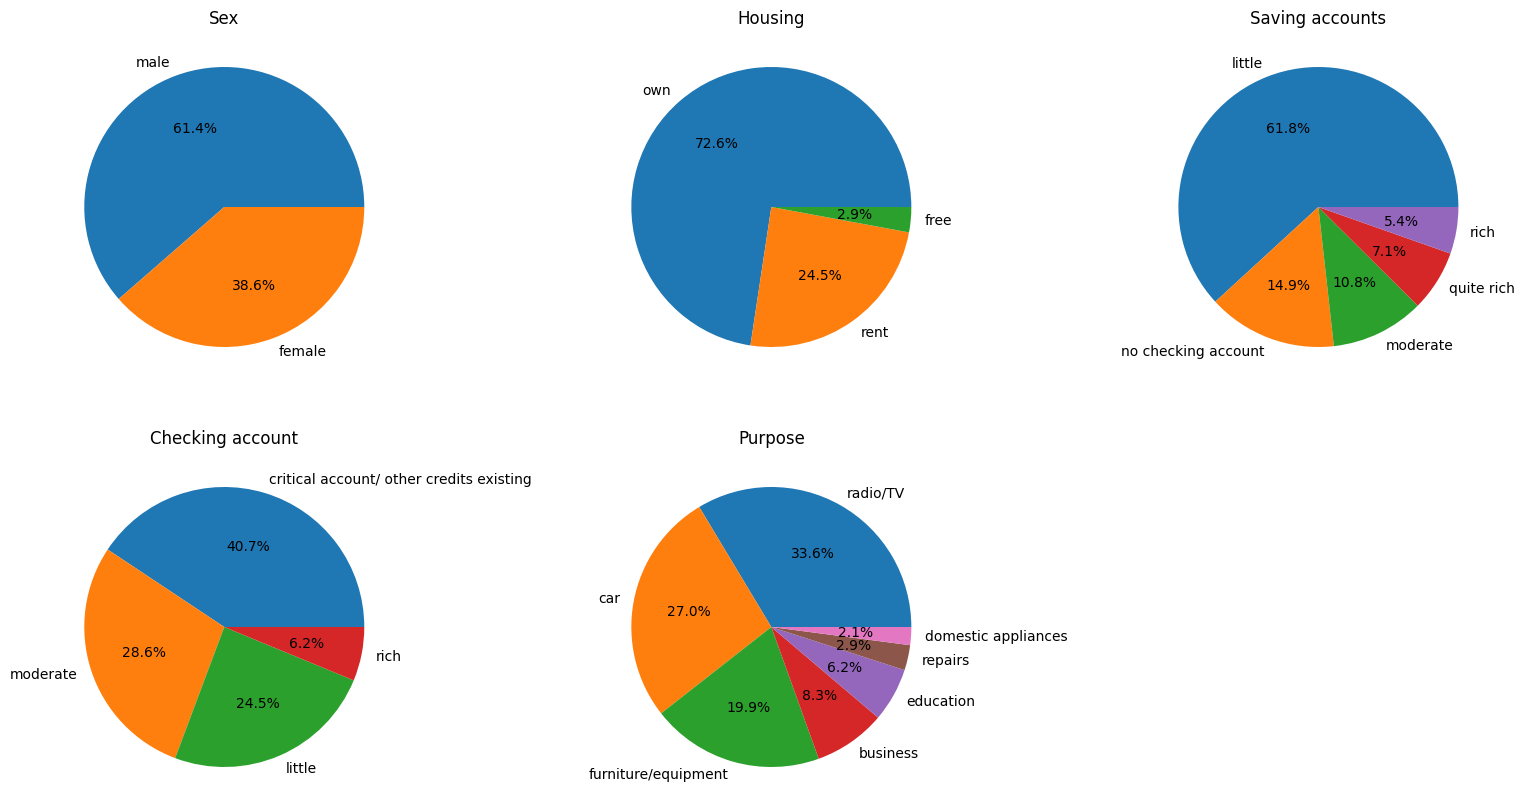

In [126]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.pie(cluster2['Sex'].value_counts(), labels= cluster2['Sex'].value_counts().index, autopct = '%1.1f%%')
plt.title('Sex')

plt.subplot(2,3,2)
plt.pie(cluster2['Housing'].value_counts(), labels= cluster2['Housing'].value_counts().index, autopct = '%1.1f%%')
plt.title('Housing')

plt.subplot(2,3,3)
plt.pie(cluster2['Saving accounts'].value_counts(), labels= cluster2['Saving accounts'].value_counts().index, autopct = '%1.1f%%')
plt.title('Saving accounts')

plt.subplot(2,3,4)
plt.pie(cluster2['Checking account'].value_counts(), labels= cluster2['Checking account'].value_counts().index, autopct = '%1.1f%%')
plt.title('Checking account')

plt.subplot(2,3,5)
plt.pie(cluster2['Purpose'].value_counts(), labels= cluster2['Purpose'].value_counts().index, autopct = '%1.1f%%')
plt.title('Purpose')
plt.show()

In [127]:
cluster2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,241.0,29.605809,6.181812,20.0,24.0,28.0,35.0,45.0
Job,241.0,1.556017,0.575521,0.0,1.0,2.0,2.0,2.0
Credit amount,241.0,1612.161826,876.962824,276.0,1037.0,1444.0,2028.0,7472.0
Duration,241.0,12.647303,4.819674,4.0,9.0,12.0,15.0,27.0
CLUSTER,241.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0


**Demographics**: This cluster includes individuals primarily in their early adulthood to mid-40s.

**Borrowing Behavior**: They request moderate credit amounts for relatively shorter durations, suggesting a cautious approach to borrowing. This group may be focused on managing short to medium-term financial needs.

**Housing**: A majority of individuals in this cluster own their homes, indicating a degree of stability in their living situation.

**Gender**: The gender distribution is relatively balanced.

**Recommendations**: Products with moderate credit limits and flexible terms, as well as options for savings and investment planning, may be appealing to this group.

## Cluster 3

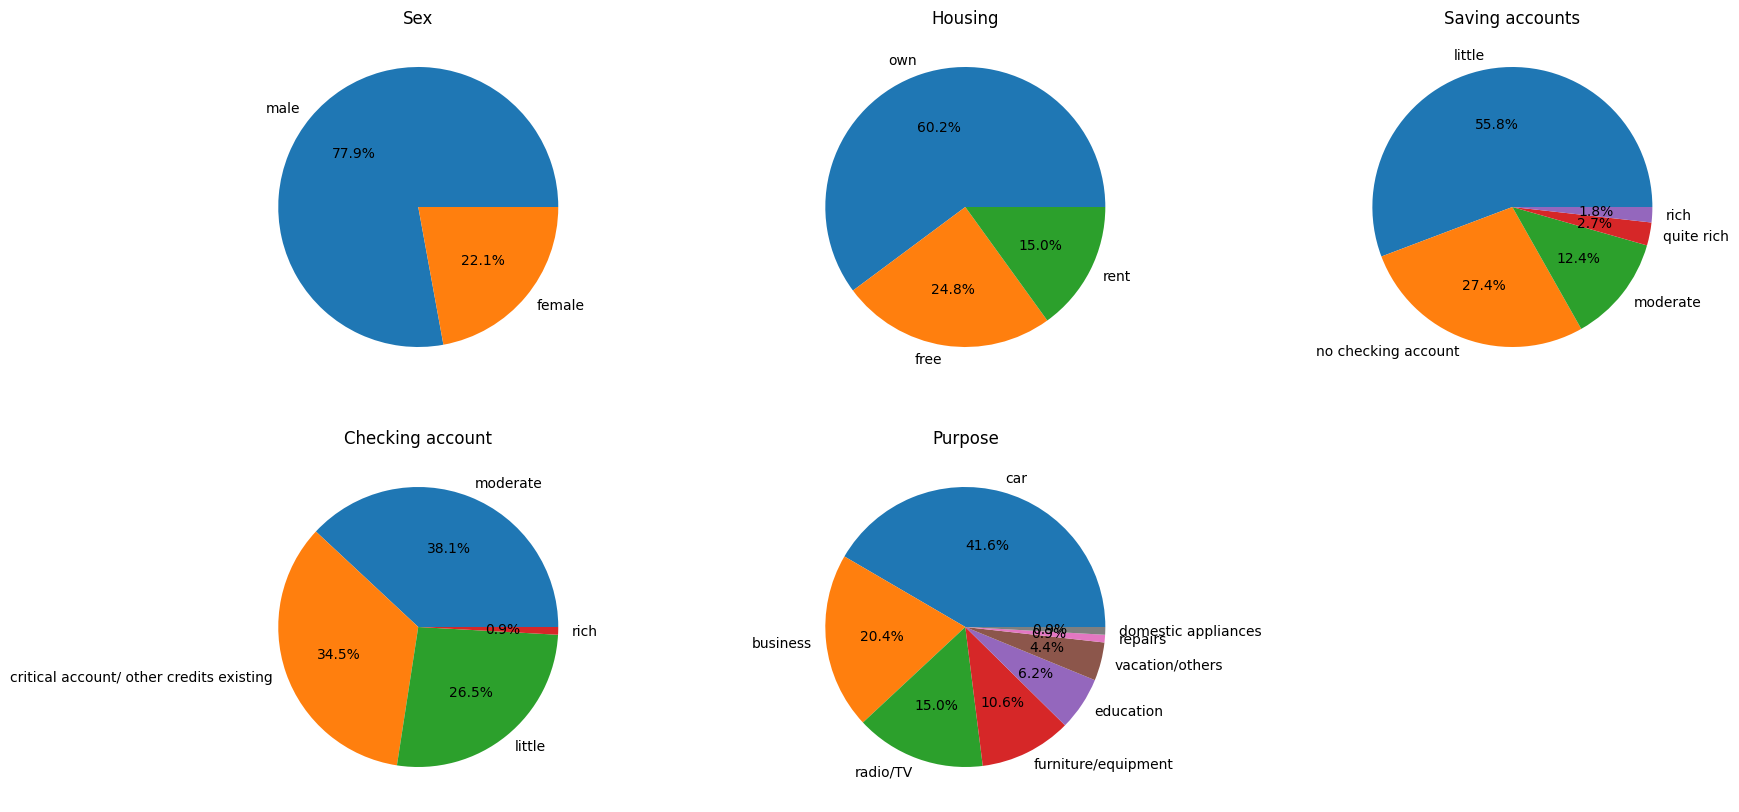

In [128]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.pie(cluster3['Sex'].value_counts(), labels= cluster3['Sex'].value_counts().index, autopct = '%1.1f%%')
plt.title('Sex')

plt.subplot(2,3,2)
plt.pie(cluster3['Housing'].value_counts(), labels= cluster3['Housing'].value_counts().index, autopct = '%1.1f%%')
plt.title('Housing')

plt.subplot(2,3,3)
plt.pie(cluster3['Saving accounts'].value_counts(), labels= cluster3['Saving accounts'].value_counts().index, autopct = '%1.1f%%')
plt.title('Saving accounts')

plt.subplot(2,3,4)
plt.pie(cluster3['Checking account'].value_counts(), labels= cluster3['Checking account'].value_counts().index, autopct = '%1.1f%%')
plt.title('Checking account')

plt.subplot(2,3,5)
plt.pie(cluster3['Purpose'].value_counts(), labels= cluster3['Purpose'].value_counts().index, autopct = '%1.1f%%')
plt.title('Purpose')
plt.show()

In [129]:
cluster3.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,113.0,35.955752,9.994989,21.0,29.0,34.0,42.0,68.0
Job,113.0,2.362832,0.583431,1.0,2.0,2.0,3.0,3.0
Credit amount,113.0,8233.132743,3037.317985,3051.0,6304.0,7476.0,9436.0,18424.0
Duration,113.0,40.442478,11.646534,6.0,36.0,39.0,48.0,72.0
CLUSTER,113.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0


**Demographics**: This cluster encompasses a wide age range, from early adulthood to late adulthood.

**Borrowing Behavior**: They request higher credit amounts, potentially indicating more substantial financial needs. Loan durations vary widely, suggesting diverse financial goals within this cluster.

**Housing**: While a significant majority own their homes, there's also a notable percentage with free housing, indicating a mix of living situations.

**Gender**: The gender distribution leans towards males.

**Recommendations**: Products with higher credit limits and a range of term options, as well as investment and wealth management services, may cater well to this group.

## Conclusion

The clusters represent distinct segments of borrowers with varying demographic and financial profiles:

**Cluster 0 - Diverse Range of Borrowing Needs**:

This cluster encompasses a wide age range with a mix of employment statuses and borrowing behaviors.
They exhibit diverse financial needs, requesting a wide range of credit amounts and loan durations.
A majority own their homes, indicating a level of stability in their living situation.

**Cluster 1 - Conservative and Older Borrowers**:

Primarily consisting of older individuals, this cluster tends to request lower credit amounts and opt for shorter loan durations, suggesting a more cautious approach to borrowing.
A significant majority own their homes, indicating a stable living situation.

**Cluster 2 - Cautious and Moderate Borrowers**:

This cluster includes individuals primarily in their early adulthood to mid-40s.
They exhibit a more cautious approach to borrowing, requesting moderate credit amounts for relatively shorter durations.
A majority of individuals in this cluster own their homes, indicating a degree of stability in their living situation.

**Cluster 3 - Diverse Financial Goals and Higher Borrowing Needs**:

This cluster encompasses a wide age range, from early adulthood to late adulthood, with a mix of employment statuses.
They request higher credit amounts, potentially indicating more substantial financial needs, and their loan durations vary widely, suggesting diverse financial goals.
While a significant majority own their homes, there's also a notable percentage with free housing, indicating a mix of living situations.
Understanding these clusters can help financial institutions tailor their lending products and services to better serve the specific needs of each group. It also provides valuable insights for risk assessment and customer relationship management. Keep in mind that these are general trends, and individual circumstances may vary within each cluster.